<a href="https://colab.research.google.com/github/D-kn/AdultDataset-Income-prediction/blob/main/Groupe2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importation des librairies nécessaires**

In [ ]:
import pandas as pd # Analyse, nettoyage et préparation des données
import numpy as np # Manipulation des matrices ou tableaux 
import seaborn as sns # Création de tracées statistiques
from matplotlib import pyplot as plt # Manipulation des données sous formes de graphiques
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Importation de la dataset et ajout des noms de chaque colonne**

In [ ]:
# Importation dataset
file_path = '/content/drive/MyDrive/TP_APPRENTISSAGE/dat/adult.xls'
fichier = pd.read_csv(file_path,
                  names=["age", "workclass", "fnlwgt", "education","education-num", "marital-status", 
                         "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
                         "hours-per-week", "native-country","classification"])
dataset = fichier.rename(columns={'education-num': 'education_num','marital-status': 'marital_status',
                                  'capital-gain': 'capital_gain', 'capital-loss': 'capital_loss',
                                  'hours-per-week': 'hours_per_week', 'native-country': 'native_country'})
dataset

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,classification
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


##**Taille de la dataset**

In [ ]:
dataset.shape

(32561, 15)

##**Liste des colonnes**

In [ ]:
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'classification'],
      dtype='object')

##**Affichage du types de chaque variables**

In [ ]:
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
classification    object
dtype: object

##**Vérification des données manqantes**

In [ ]:
dataset[dataset.isnull().any(axis=1)].count()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
classification    0
dtype: int64

##**Affichage des 5 premieres lignes**

In [ ]:
dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,classification
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##**Affichage des 5 dernieres lignes**

In [ ]:
dataset.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,classification
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


##**Visualissation de certains détails statistiques de base de notre dataset**

In [ ]:
dataset.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##**Visualisation de certaines variables de notre dataset**

In [ ]:
dataset['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

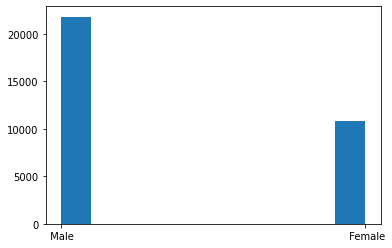

In [ ]:
x = dataset['sex']
plt.hist(x)
plt.show()

In [ ]:
dataset['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

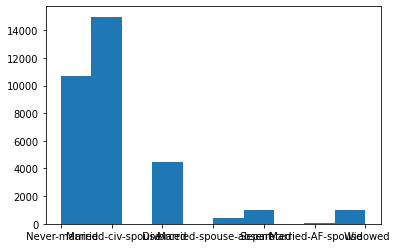

In [ ]:
x = dataset['marital_status']
plt.hist(x)
plt.show()

##**Corrélation entre les variables**

In [ ]:
dataset.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


## **Analyse des composantes principales**

In [ ]:
# PCA pourcentage de perte
x = dataset.select_dtypes(include="int")
print("Nombre de variales quantitative:", len(x.columns))
x = StandardScaler().fit_transform(x)
component_var = {}
for i in range(2, 7):
    pca = PCA(n_components=i)
    res = pca.fit_transform(x)
    print('Nombre de composants: ', i)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents)
    pca.explained_variance_ratio_
    print("Pourcentage de perte :" +str(sum(pca.explained_variance_ratio_)*100))
    component_var[i] = sum(pca.explained_variance_ratio_)
print(component_var)

Nombre de variales quantitative: 6
Nombre de composants:  2
Pourcentage de perte :39.193318016776956
Nombre de composants:  3
Pourcentage de perte :56.16997477923884
Nombre de composants:  4
Pourcentage de perte :71.86650763979159
Nombre de composants:  5
Pourcentage de perte :86.64056569927166
Nombre de composants:  6
Pourcentage de perte :100.0
{2: 0.39193318016776957, 3: 0.5616997477923884, 4: 0.718665076397916, 5: 0.8664056569927167, 6: 1.0}


###**Graphe de perte en fonction du nombre de composant**

Text(0, 0.5, 'Variance cumulative expliquée')

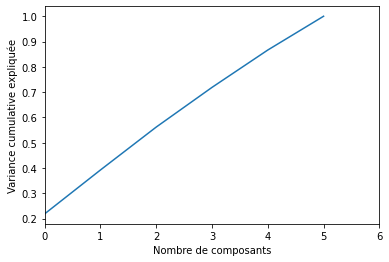

In [ ]:
# Variables quantitatives
x = dataset.select_dtypes(include="int")
# Instanciation pour la standardisation 
sc = StandardScaler()
# Normalisation: centrage-réduction
data_acp_standardise = sc.fit_transform(x)
pca = PCA().fit(data_acp_standardise)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,6,1)
plt.xlabel('Nombre de composants')
plt.ylabel('Variance cumulative expliquée')

##**Normalisation de certaines variables de notre datatset**

In [ ]:
# Reduction du nombre de column de la variable native_country
dataset.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
taille_dataset = dataset.shape[0]
for i in range(taille_dataset):
  if ((dataset.iloc[i,13] == ' United-States') or (dataset.iloc[i,13] == 1) ):
    dataset.at[i,'native_country'] = 1 
  else:
    dataset.at[i,'native_country'] = 0
dataset.native_country.value_counts()

1    29170
0     3391
Name: native_country, dtype: int64

In [ ]:
dataset.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
#Ajout des occupations Protective-serv, Priv-house-serv Armed-Forces sur la nouvelle variable Other
dataset['occupation'] = dataset.occupation.str.replace('Priv-house-serv', 'Other').str.replace('Armed-Forces', 'Other').str.replace('Protective-serv', 'Other').str.replace('?', 'Other')
dataset.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Other                2650
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
Name: occupation, dtype: int64

In [ ]:
dataset.race.value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [ ]:
#Ajout des amérindiens sur Other
dataset['race'] = dataset.race.str.replace('Other', 'Other').str.replace('Amer-Indian-Eskimo', 'Other')
dataset.race.value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Other                   582
Name: race, dtype: int64

In [ ]:
dataset.marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [ ]:
#Ajout des statuts Married-spouse-absent Married-AF-spouse sur Other
dataset['marital_status'] = dataset.marital_status.str.replace('Married-spouse-absent', 'Other').str.replace('Married-AF-spouse', 'Other')
dataset.marital_status.value_counts()

 Married-civ-spouse    14976
 Never-married         10683
 Divorced               4443
 Separated              1025
 Widowed                 993
 Other                   441
Name: marital_status, dtype: int64

In [ ]:
dataset.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
#Ajout des workclass Without-pay Never-worked sur Self-emp-inc
dataset['workclass'] = dataset.workclass.str.replace('Self-emp-inc', 'Self-emp-inc').str.replace('Without-pay', 'Self-emp-inc').str.replace('Never-worked', 'Self-emp-inc')
dataset.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1137
 Federal-gov           960
Name: workclass, dtype: int64

In [ ]:
dataset.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [ ]:
#Ajout des sex Female = 0  et Male = 1
dataset['sex'] = dataset.sex.str.replace('Female', '0').str.replace('Male', '1')
dataset.sex.value_counts()

 1    21790
 0    10771
Name: sex, dtype: int64

In [ ]:
dataset.education_num.value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [ ]:
#Suppression de la colonne education_num car elle ne donne pas d'information
dataset.drop('education_num', axis=1,inplace = True)
dataset.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,classification
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,1,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,1,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,1,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,0,<=50K


##**Transformation de nos variables qualitative en numérique**

In [ ]:
#Transformation des variables qui n'ont que pour valeur 1 ou 0
categories = ['sex', 'native_country', 'classification'] 
#objList = dataset.select_dtypes(include = "object").columns
le = preprocessing.LabelEncoder()
for cat in categories:
    dataset[cat] = le.fit_transform(dataset[cat].astype(str))

In [ ]:
dataset.head

<bound method NDFrame.head of        age          workclass  ...  native_country classification
0       39          State-gov  ...               1              0
1       50   Self-emp-not-inc  ...               1              0
2       38            Private  ...               1              0
3       53            Private  ...               1              0
4       28            Private  ...               0              0
...    ...                ...  ...             ...            ...
32556   27            Private  ...               1              0
32557   40            Private  ...               1              1
32558   58            Private  ...               1              0
32559   22            Private  ...               1              0
32560   52       Self-emp-inc  ...               1              1

[32561 rows x 14 columns]>

In [ ]:
dataset

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,classification
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,1,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,1,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,1,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,1,0
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,1,1
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,1,0
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,1,0,0,20,1,0


In [ ]:
dataset.classification.value_counts()

0    24720
1     7841
Name: classification, dtype: int64

In [ ]:
#Dummy
dataset_with_dummies = pd.get_dummies(data=dataset, columns = [ 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race',], 
                                     prefix = ['workclass','education', 'marital_status', 'occupation', 'relationship', 'race',])
print(dataset_with_dummies.shape)
dataset_with_dummies.head()

(32561, 59)


,age,fnlwgt,sex,capital_gain,capital_loss,hours_per_week,native_country,classification,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-civ-spouse,marital_status_ Never-married,marital_status_ Other,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other,occupation_ Other-service,occupation_ Prof-specialty,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,77516,1,2174,0,40,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,50,83311,1,0,0,13,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,38,215646,1,0,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,53,234721,1,0,0,40,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0


In [ ]:
# The Correltion matrix
corr = dataset_with_dummies.corr()
corr

,age,fnlwgt,sex,capital_gain,capital_loss,hours_per_week,native_country,classification,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-civ-spouse,marital_status_ Never-married,marital_status_ Other,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other,occupation_ Other-service,occupation_ Prof-specialty,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
age,1.000000,-0.076646,0.088832,0.077674,0.057775,0.068756,0.015917,0.234037,0.042627,0.051227,0.060901,-0.198388,0.101808,0.136252,0.012763,-0.014504,-0.088314,-0.056016,0.039921,0.032076,0.102886,0.023014,-0.016196,-0.000434,0.010516,0.075787,0.019870,0.094761,0.012146,0.060651,-0.111262,0.129975,0.315679,-0.534359,0.013528,0.010210,0.265177,-0.042902,0.012515,0.099352,0.034210,-0.098579,-0.016257,0.040149,-0.089346,0.054170,-0.031980,-0.019576,0.026909,0.316875,-0.010106,-0.070002,-0.432918,0.043188,0.020854,-0.011111,-0.019434,-0.031039,0.033412
fnlwgt,-0.076646,1.000000,0.026858,0.000432,-0.010252,-0.018768,-0.075287,-0.009463,-0.002923,-0.007525,-0.002828,0.042907,-0.024348,-0.039058,-0.010891,0.011479,0.009440,0.010250,0.033791,0.041094,-0.002290,0.015246,0.006358,-0.015643,-0.007240,-0.003307,-0.001566,-0.022229,0.017303,-0.005231,-0.005269,-0.014973,-0.026363,0.037108,0.003446,0.028467,-0.026246,0.007765,0.008465,-0.019198,-0.032932,0.029015,0.012762,0.008314,-0.003719,-0.016206,0.003728,0.003765,0.001265,-0.021140,0.007503,0.025518,0.013818,0.004400,-0.016897,-0.051323,0.118009,-0.042718,-0.056896
sex,0.088832,0.026858,1.000000,0.048480,0.045567,0.229309,-0.006993,0.215980,-0.065556,0.000989,-0.037966,-0.034699,0.083245,0.107451,-0.019895,0.005333,-0.015160,-0.000436,0.008722,0.016969,0.025133,0.013631,-0.024947,-0.013872,0.026837,0.029525,0.011684,0.009902,0.001437,0.048793,-0.061722,-0.228621,0.431805,-0.171434,-0.041292,-0.109135,-0.188487,-0.263148,0.223128,0.036729,0.100097,0.094026,0.030502,-0.043304,-0.153677,-0.028511,-0.011504,-0.016092,0.132468,0.580135,-0.168879,-0.040282,-0.102369,-0.321273,-0.319311,-0.000856,-0.115604,-0.017478,0.103486
capital_gain,0.077674,0.000432,0.048480,1.000000,-0.031615,0.078409,0.004599,0.223329,-0.015585,-0.005768,-0.007007,-0.038701,0.095660,0.031847,-0.010373,-0.015653,-0.022598,-0.012474,-0.009281,-0.012410,-0.016254,-0.012614,-0.010898,-0.010337,0.040769,0.056671,-0.046791,0.047527,-0.000961,0.169658,-0.034826,-0.018798,0.085873,-0.066334,-0.006905,-0.013233,-0.012166,-0.028502,-0.022000,0.060618,-0.011724,-0.023272,-0.025957,-0.018866,-0.040271,0.085222,0.011652,-0.009372,-0.018061,0.080175,-0.026489,-0.019046,-0.053601,-0.029004,0.017730,0.009851,-0.020631,-0.005632,0.014429
capital_loss,0.057775,-0.010252,0.045567,-0.031615,1.000000,0.054256,0.008784,0.150526,-0.016102,0.010798,0.014668,-0.027460,0.030669,0.021175,-0.002047,-0.012982,-0.017874,-0.015836,-0.006966,-0.004806,-0.007639,-0.018325,0.002793,-0.007602,0.034183,0.049377,-0.028829,0.046586,-0.002046,0.047923,-0.020884,-0.022396,0.080466,-0.060623,-0.009461,-0.013061,-0.003361,-0.023806,0.001094,0.048311,-0.010670,-0.021672,-0.016259,-0.017805,-0.040847,0.046255,0.009697,0.004830,-0.003282,0.075491,-0.017299,-0.

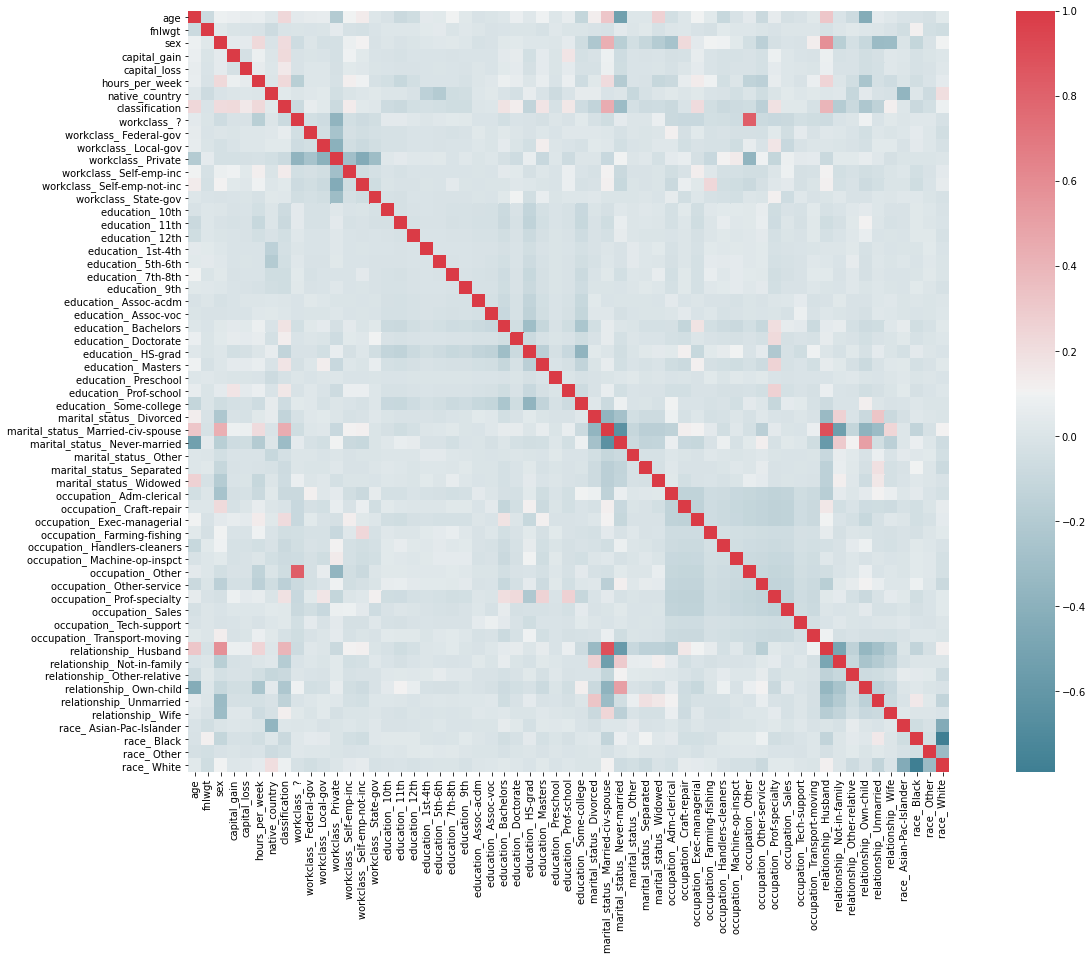

In [ ]:
# Matrice de corrélation 
f, ax = plt.subplots(figsize=(24, 14))
corr = dataset_with_dummies.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)
#plt.savefig('matrice_correlation2')

In [ ]:
# Create correlation matrix
corr_matrix = dataset_with_dummies.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

In [ ]:
to_drop

['marital_status_ Never-married',
 'occupation_ Other',
 'relationship_ Husband',
 'relationship_ Not-in-family',
 'relationship_ Own-child',
 'race_ White']

In [ ]:
my_y=dataset_with_dummies['classification']

In [ ]:
dataset_after_dummies = dataset_with_dummies.drop(dataset_with_dummies[to_drop], axis=1 )
dataset_after_dummies

,age,fnlwgt,sex,capital_gain,capital_loss,hours_per_week,native_country,classification,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-civ-spouse,marital_status_ Other,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Prof-specialty,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Other-relative,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other
0,39,77516,1,2174,0,40,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,83311,1,0,0,13,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,38,215646,1,0,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,53,234721,1,0,0,40,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,28,338409,0,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,0,0,0,38,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
32557,40,154374,1,0,0,40,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
32558,58,151910,0,0,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32559,22,201490,1,0,0,20,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##**Récupération des variables et de la variable à  prédire**

In [ ]:
y=my_y
t = dataset_after_dummies.drop(['classification'],axis=1)
x = dataset_after_dummies.drop(['classification'],axis=1)
#Normalisation des données
norm = StandardScaler()
norm.fit(x)
x = norm.transform(x)

In [ ]:
t

,age,fnlwgt,sex,capital_gain,capital_loss,hours_per_week,native_country,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-civ-spouse,marital_status_ Other,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Prof-specialty,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Other-relative,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other
0,39,77516,1,2174,0,40,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,83311,1,0,0,13,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,38,215646,1,0,0,40,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,53,234721,1,0,0,40,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,28,338409,0,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,0,0,0,38,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
32557,40,154374,1,0,0,40,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
32558,58,151910,0,0,0,40,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32559,22,201490,1,0,0,20,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##**Creation de la base d'entrainement et de Test**

In [ ]:
split_size=0.2
#Creation of Train and Test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=split_size,random_state=22)

In [ ]:
x_train

array([[-1.14233079,  0.20605374,  0.70307135, ..., -0.18155194,
        -0.32576824, -0.13490531],
       [-1.21564337,  0.24270045,  0.70307135, ..., -0.18155194,
        -0.32576824, -0.13490531],
       [-1.43558112,  2.04929418, -1.42233076, ..., -0.18155194,
        -0.32576824, -0.13490531],
       ...,
       [-0.77576787, -1.05565231,  0.70307135, ..., -0.18155194,
         3.06966697, -0.13490531],
       [-1.43558112,  0.29408922, -1.42233076, ..., -0.18155194,
        -0.32576824, -0.13490531],
       [ 0.25060831, -0.06227825, -1.42233076, ..., -0.18155194,
        -0.32576824, -0.13490531]])

In [ ]:
print ("Train dataset: {0}{1}".format(x_train.shape, y_train.shape))
print ("Test dataset: {0}{1}".format(x_test.shape, y_test.shape))

Train dataset: (26048, 52)(26048,)
Test dataset: (6513, 52)(6513,)


##**Création des models**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
names = ['DecisionTree classifier','Naive bayes','Logistic regression']
models = []
models.append((DecisionTreeClassifier()))
models.append((GaussianNB()))
models.append((LogisticRegression(random_state=0)))
print (models)

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), GaussianNB(priors=None, var_smoothing=1e-09), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)]


In [ ]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
kfold = model_selection.KFold(n_splits=5,random_state=100)
for i in range(0,len(models)):
    score=models[i].fit(x_train,y_train)
    prediction = models[i].predict(x_test)
    acc_score = accuracy_score(y_test,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


----------------------------------------
DecisionTree classifier: 0.8132964839551666
----------------------------------------
Naive bayes: 0.592814371257485
----------------------------------------
Logistic regression: 0.8466144633809305


##**Validation croisée**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Decision Tree
tree_clf = DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, x_train, y_train, cv=5)
print("Cross-validation scores:\n{}".format(tree_scores))
print("Cross-validation scores mean:\n{}".format(tree_scores.mean()))

Cross-validation scores:
[0.81746641 0.81228407 0.81765835 0.81301593 0.81973507]
Cross-validation scores mean:
0.8160319674091314


In [ ]:
#Naive_bayes
bayes_clf = GaussianNB()
bayes_scores = cross_val_score(bayes_clf, x_train, y_train, cv=5)
print("Cross-validation scores:\n{}".format(bayes_scores))
print("Cross-validation scores mean:\n{}".format(bayes_scores.mean()))

Cross-validation scores:
[0.58771593 0.58598848 0.58771593 0.60568247 0.58533308]
Cross-validation scores mean:
0.5904871790998083


In [ ]:
#Logistic regression
rgl_clf = LogisticRegression(random_state=0)
rgl_scores = cross_val_score(rgl_clf, x_train, y_train, cv=5)
print("Cross-validation scores:\n{}".format(rgl_scores))
print("Cross-validation scores mean:\n{}".format(rgl_scores.mean()))

Cross-validation scores:
[0.85412668 0.85489443 0.84952015 0.84718756 0.85448263]
Cross-validation scores mean:
0.852042290602158


##**Matrice de confusion**

In [ ]:
import seaborn as sns

In [ ]:
#DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier(random_state = 100)
clf_dtc.fit(x_train, y_train)
y_pred = clf_dtc.predict(x_test)
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,y_pred))
print ('-'*40)
print ('Confusion Matrix:')
conf1 = confusion_matrix(y_test,y_pred)
print (conf1)

----------------------------------------
Accuracy score:
0.8142177184093352
----------------------------------------
Confusion Matrix:
[[4297  578]
 [ 632 1006]]


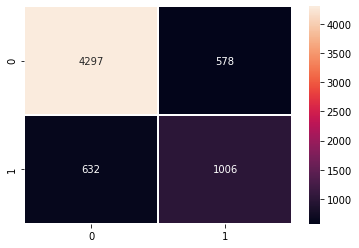

In [ ]:
sns.heatmap(conf1, linewidths=1, annot=True, fmt='g')

In [ ]:
#Naive_bayes
clf_nb = GaussianNB()
clf_nb.fit(x_train, y_train)
y_pred = clf_nb.predict(x_test)
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,y_pred))
print ('-'*40)
print ('Confusion Matrix:')
conf2 = confusion_matrix(y_test,y_pred)
print (conf2)

----------------------------------------
Accuracy score:
0.592814371257485
----------------------------------------
Confusion Matrix:
[[2364 2511]
 [ 141 1497]]


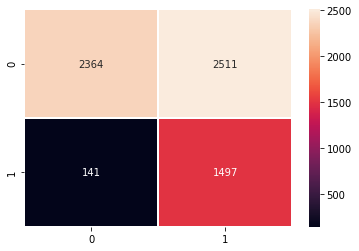

In [ ]:
sns.heatmap(conf2, linewidths=1, annot=True, fmt='g')

In [ ]:
#Logistic regression
clf_rgl = LogisticRegression(random_state=100)
clf_rgl.fit(x_train, y_train)
y_pred = clf_rgl.predict(x_test)
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,y_pred))
print ('-'*40)
print ('Confusion Matrix:')
conf3 = confusion_matrix(y_test,y_pred)
print (conf3)

----------------------------------------
Accuracy score:
0.8466144633809305
----------------------------------------
Confusion Matrix:
[[4535  340]
 [ 659  979]]


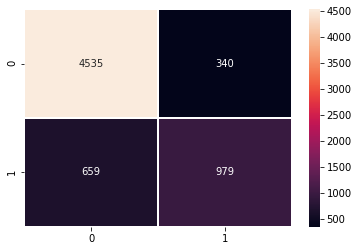

In [ ]:
sns.heatmap(conf3, linewidths=1, annot=True, fmt='g')

In [ ]:
import pandas
fi = pd.DataFrame({'feature': t.columns, 'importance': clf_dtc.feature_importances_}).sort_values(by='importance', ascending=False)
fi = fi.reset_index()
pandas.set_option('display.max_rows',fi.shape[0]+1)
print(fi)

    index                             feature  importance
0      31  marital_status_ Married-civ-spouse    0.195921
1       1                              fnlwgt    0.183535
2       0                                 age    0.123971
3       3                        capital_gain    0.120256
4       5                      hours_per_week    0.067798
5       4                        capital_loss    0.051835
6      23                education_ Bachelors    0.023142
7      42          occupation_ Prof-specialty    0.022167
8      37         occupation_ Exec-managerial    0.020701
9      12         workclass_ Self-emp-not-inc    0.011370
10     26                  education_ Masters    0.010889
11     10                  workclass_ Private    0.009501
12     43                   occupation_ Sales    0.008984
13      6                      native_country    0.008536
14      2                                 sex    0.008378
15     36            occupation_ Craft-repair    0.007779
16      9     